### Dataset descargado desde
## https://ieee-dataport.org/documents/smart-defender-dataset

La descripción de los campos que componen los datos del dataset están disponible en esa URL

# PARTE 1: Uso de Spark para análisis de datos, Dataframes #

In [2]:
# Mostrar la versión de Spark usada
from pyspark.sql import SparkSession

# Inicializamos SparkSession
spark = SparkSession.builder.appName("Parte1").getOrCreate()

# Obtenemos la versión de Spark
spark.version

# Datos de la sesión spark
# Obtenemos información sobre la aplicación Spark
app_id = spark.sparkContext.applicationId
app_name = spark.sparkContext.appName
print(f"ID de la aplicación: {app_id}")
print(f"Nombre de la aplicación: {app_name}")
print(f"Versión de Spark: {spark.version}")
print(f"Estado de la sesión: {spark.sparkContext.getConf().get('spark.executor.instances')}")


ID de la aplicación: local-1704136919776
Nombre de la aplicación: Parte1
Versión de Spark: 3.5.0
Estado de la sesión: None


In [3]:
# Cargar el dataset en un Dataframe

# Ruta al archivo CSV
file_path = "dataset_descriptor.csv"

# Cargamos el archivo CSV en un DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Mostramos las primeras filas del DataFrame
df.show()


+--------+-----------------+-----------------+------------------+-----------------+-------------------+---------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-------------------+---------+-----------------+-----------------+-----------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+-----------------+----------+------------+---------+---------+-------------+--------+---------+-------------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+-----------------+-------------------+-----------------+-----------+-----------------+-----------------+------------------+-------------------+------------------+-------------------+------------------+-----------------+-------------------+-----------------+---

In [4]:
# Mostrar el schema heredado
df.printSchema()


root
 |-- ip_proto: double (nullable = true)
 |-- ip_len_mean: double (nullable = true)
 |-- ip_len_median: double (nullable = true)
 |-- ip_len_var: double (nullable = true)
 |-- ip_len_std: double (nullable = true)
 |-- ip_len_entropy: double (nullable = true)
 |-- ip_len_cv: double (nullable = true)
 |-- ip_len_cvq: double (nullable = true)
 |-- ip_len_rte: double (nullable = true)
 |-- ip_ttl_mean: double (nullable = true)
 |-- ip_ttl_median: double (nullable = true)
 |-- ip_ttl_var: double (nullable = true)
 |-- ip_ttl_std: double (nullable = true)
 |-- ip_ttl_entropy: double (nullable = true)
 |-- ip_ttl_cv: double (nullable = true)
 |-- ip_ttl_cvq: double (nullable = true)
 |-- ip_ttl_rte: double (nullable = true)
 |-- sport_mean: double (nullable = true)
 |-- sport_median: double (nullable = true)
 |-- sport_var: double (nullable = true)
 |-- sport_std: double (nullable = true)
 |-- sport_entropy: double (nullable = true)
 |-- sport_cv: double (nullable = true)
 |-- sport_cvq: 

In [5]:
# Mostrar el número de registros del dataset
num_registros = df.count()
print("Número de registros:", num_registros)

Número de registros: 45500


In [6]:
# Q1. ¿Cuantas clases de tipo de tráfico hay clasificadas en el campo label1?
num_clases = df.select('label1').distinct().count()
print("Número de clases de tipo de tráfico:", num_clases)

# Obtenemos todas las clases únicas en el campo label1
clases_label1 = df.select('label1').distinct()

clases_label1.show()

Número de clases de tipo de tráfico: 11
+-----------------+
|           label1|
+-----------------+
|       http_flood|
|   http_slow_body|
|  http_slow_range|
|           normal|
|   http_slow_read|
|http_slow_headers|
|    tcp_ack_flood|
|    tcp_fin_flood|
|tcp_syn_ack_flood|
|        udp_flood|
|    tcp_syn_flood|
+-----------------+



In [7]:
# Q2. ¿Cuantas clases de tipo de tráfico hay clasificadas en el campo label3?
num_clases_label3 = df.select('label3').distinct().count()
print("Número de clases de tipo de tráfico en label3:", num_clases_label3)

# Obtenemos todas las clases únicas en el campo label3
clases_label3 = df.select('label3').distinct()

clases_label3.show()

Número de clases de tipo de tráfico en label3: 5
+----------+
|    label3|
+----------+
|http_flood|
|    normal|
| http_slow|
| tcp_flood|
| udp_flood|
+----------+



In [8]:
#Q3 ¿Que porcentaje de tráfico está catalogado como anormal? Entiendase por anormal aquel que no está etiquetado como normal.
from pyspark.sql.functions import col

# Contamos los registros etiquetados como 'normal'
num_normal = df.filter(col('label1') == 'normal').count()

# Contamos el total de registros en el DataFrame
total_registros = df.count()

# Calculamos el número de registros anormales
num_anormal = total_registros - num_normal

# Calculamos el porcentaje de tráfico anormal
porcentaje_anormal = (num_anormal / total_registros) * 100
print(f"Porcentaje de tráfico anormal: {porcentaje_anormal:.2f}%")


Porcentaje de tráfico anormal: 49.26%


+----------+-------------------+
|    label3|         percentage|
+----------+-------------------+
|http_flood| 0.7626373626373626|
|    normal|  50.74285714285715|
| http_slow|0.40219780219780216|
| tcp_flood|  32.94065934065934|
| udp_flood| 15.151648351648353|
+----------+-------------------+



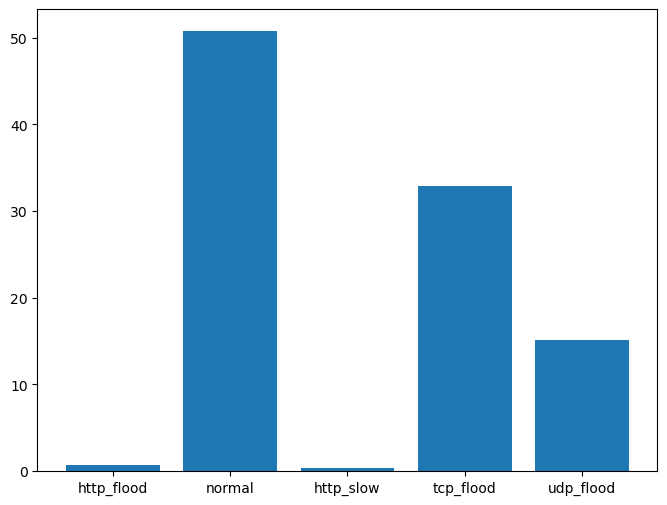

In [11]:
# Q4 Mostrar los porcentajes de trafico sobre el total asociados a cada tipo de etiqueta de tráfico 
# (usar el campo genérico Label3 y no el detallado Label 1)

# Calculamos el número de registros por cada etiqueta en label3
traffic_counts = df.groupBy('label3').count()

# Calculamos el total de registros
total_registros = df.count()

# Calculamos los porcentajes de tráfico por cada etiqueta en label3
traffic_percentages = traffic_counts.withColumn('percentage', (col('count') / total_registros) * 100)

# Mostramos los porcentajes de tráfico por etiqueta en Label3
traffic_percentages.select('label3', 'percentage').show()

# Mostrar un diagrama con estos porcentajes (bar plot)
import matplotlib.pyplot as plt


# Convertimos los resultados a un DataFrame de Pandas
data_pd = traffic_percentages.toPandas()

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(data_pd['label3'], data_pd['percentage'])
plt.show()

In [15]:
# Q5 Identificar que tipo de tráfico de red está incluido en el dataset (usar el campo ip_proto y convertir 
# ese valor al real que debería tener, es decir, un entero en el rango definido por el IANA)
# https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml

from pyspark.sql import functions as F

# Buscamos los diferentes valores de 'ip_proto'
df.select('ip_proto').distinct().show()

# Creamos una nueva columna 'ip_proto_int' con los valores en el rango IANA, esto es, multiplicando por 1000 cada valor de 'ip_proto'
df = df.withColumn('ip_proto_int', F.col('ip_proto')*1000)


df.select('ip_proto_int').distinct().show()

+--------+
|ip_proto|
+--------+
|   0.017|
|   0.006|
+--------+

+------------+
|ip_proto_int|
+------------+
|        17.0|
|         6.0|
+------------+



In [16]:
# Q6 Calcular la cantidad total (suponer que el dato a aculumar para cada paquete es ip_len_mean) 
# de bytes transmitidos agrupados por protocolo

from pyspark.sql import functions as F

# Calculamos la cantidad total de bytes transmitidos agrupados por protocolo
total_bytes_por_protocolo = df.groupBy('ip_proto_int').agg(F.sum('ip_len_mean'))


total_bytes_por_protocolo.show()


+------------+-----------------+
|ip_proto_int| sum(ip_len_mean)|
+------------+-----------------+
|        17.0|7064.346040678178|
|         6.0| 26867.1914740567|
+------------+-----------------+



In [17]:
# Q7 Indicar cual es tráfico anómalo en UDP que usa más tráfico de red. Presentar los resultados en orden demayor a menor

from pyspark.sql import functions as F

# Filtramos el tráfico en UDP
udp_traffic = df.filter(col('ip_proto_int') == 17)

# Calculamos la suma total del campo ip_len_mean por etiqueta de clase
udp_traffic_total = udp_traffic.groupBy('Label1').agg(F.sum('ip_len_mean').alias('total_bytes_transmitidos'))

# Ordenamos los resultados de mayor a menor tráfico de red
udp_traffic_total = udp_traffic_total.orderBy('total_bytes_transmitidos', ascending=False)


udp_traffic_total.show()

+---------+------------------------+
|   Label1|total_bytes_transmitidos|
+---------+------------------------+
|udp_flood|                  6894.0|
|   normal|      170.34604067817844|
+---------+------------------------+



In [18]:
# Q8 Indicar cual es tráfico anómalo en TCP que usa más tráfico de red. Presentar los resultados en orden demayor a menor

from pyspark.sql import functions as F

# Filtramos el tráfico anómalo en TCP
tcp_anomalous_traffic = df.filter((col('ip_proto_int') == 6) & (col('Label2') == 'attack'))

# Calculamos la suma total del campo ip_len_mean por etiqueta de clase
tcp_anomalous_traffic_total = tcp_anomalous_traffic.groupBy('Label1').agg(F.sum('ip_len_mean').alias('total_bytes_transmitidos'))

# Filtramos el tráfico normal en TCP
tcp_normal_traffic = df.filter((col('ip_proto_int') == 6) & (col('Label1') == 'normal'))

# Calculamos la suma total del campo ip_len_mean para el tráfico normal en TCP
tcp_normal_traffic_total = tcp_normal_traffic.groupBy('Label1').agg(F.sum('ip_len_mean').alias('total_bytes_transmitidos'))

# Unimos los resultados de tráfico anómalo con el tráfico normal en TCP
combined_tcp_traffic = tcp_normal_traffic_total.union(tcp_anomalous_traffic_total)

# Ordenamos de manera descendente
combined_tcp_traffic = combined_tcp_traffic.orderBy('total_bytes_transmitidos', ascending=False)


combined_tcp_traffic.show()




+-----------------+------------------------+
|           Label1|total_bytes_transmitidos|
+-----------------+------------------------+
|           normal|      11615.053998509025|
|    tcp_syn_flood|       5713.195544936026|
|tcp_syn_ack_flood|       5273.157952268173|
|    tcp_ack_flood|                  2000.0|
|    tcp_fin_flood|                  2000.0|
|       http_flood|       90.88054677859463|
|  http_slow_range|       44.20993791090954|
|http_slow_headers|      44.157370741482964|
|   http_slow_read|      43.283366733466934|
|   http_slow_body|      43.252756179024715|
+-----------------+------------------------+



# PARTE 2: Uso de Spark para análisis de datos, Spark SQL #

Contestar a las cuestiones anteriores empleando Spark SQL

In [19]:
# Crear la vista en memoria y añadir una celda por cada cuestión que se debe responder

df.createOrReplaceTempView("traffic_table")

In [20]:
# Q1. ¿Cuantas clases de tipo de tráfico hay clasificadas en el campo label1?


# Ejecutamos la consulta SQL para contar las clases de tráfico en el campo Label1
num_traffic_classes = spark.sql("SELECT COUNT(DISTINCT Label1) AS num_classes_label1 FROM traffic_table")


num_traffic_classes.show()

# Ejecutamos la consulta SQL para poner las clases distintas de tráfico en el campo Label1
traffic_classes = spark.sql("SELECT DISTINCT Label1 FROM traffic_table")


traffic_classes.show()

+------------------+
|num_classes_label1|
+------------------+
|                11|
+------------------+

+-----------------+
|           Label1|
+-----------------+
|       http_flood|
|   http_slow_body|
|  http_slow_range|
|           normal|
|   http_slow_read|
|http_slow_headers|
|    tcp_ack_flood|
|    tcp_fin_flood|
|tcp_syn_ack_flood|
|        udp_flood|
|    tcp_syn_flood|
+-----------------+



In [21]:
# Q2. ¿Cuantas clases de tipo de tráfico hay clasificadas en el campo label3?

# Ejecutamos la consulta SQL para contar las clases de tráfico en el campo Label3
num_traffic_classes_label3 = spark.sql("SELECT COUNT(DISTINCT Label3) AS num_classes_label3 FROM traffic_table")

num_traffic_classes_label3.show()

# Ejecutamos la consulta SQL para poner las clases distintas de tráfico en el campo Label3
traffic_classes = spark.sql("SELECT DISTINCT Label3 FROM traffic_table")

traffic_classes.show()


+------------------+
|num_classes_label3|
+------------------+
|                 5|
+------------------+

+----------+
|    Label3|
+----------+
|http_flood|
|    normal|
| http_slow|
| tcp_flood|
| udp_flood|
+----------+



In [22]:
#Q3 ¿Que porcentaje de tráfico está catalogado como anormal? Entiendase por anormal aquel que no está etiquetado como normal.

# Calculamos el porcentaje de tráfico que no está etiquetado como normal
anomalous_traffic = spark.sql("SELECT COUNT(*) AS total_anomalous FROM traffic_table WHERE Label1 != 'normal'")
total_traffic = spark.sql("SELECT COUNT(*) AS total_traffic FROM traffic_table")

# Calculamos el porcentaje
anomalous_traffic_percentage = (anomalous_traffic.collect()[0]['total_anomalous'] / total_traffic.collect()[0]['total_traffic']) * 100

print(f"El porcentaje de tráfico catalogado como anormal es: {anomalous_traffic_percentage:.2f}%")


El porcentaje de tráfico catalogado como anormal es: 49.26%


+----------+-------------------+
|    Label3|         percentage|
+----------+-------------------+
|http_flood| 0.7626373626373626|
|    normal|  50.74285714285715|
| http_slow|0.40219780219780216|
| tcp_flood|  32.94065934065934|
| udp_flood| 15.151648351648353|
+----------+-------------------+



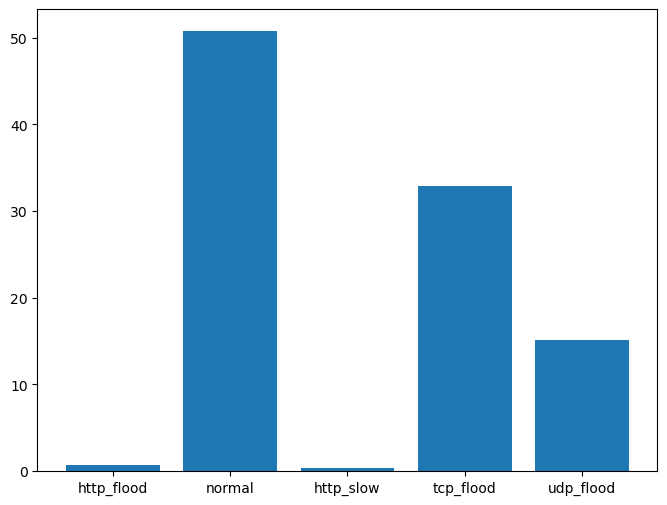

In [25]:
# Q4 Mostrar los porcentajes de trafico sobre el total asociados a cada tipo de etiqueta de tráfico 
# (usar el campo genérico Label3 y no el detallado Label 1)

# Calculamos el porcentaje de cada tipo de etiqueta de tráfico
traffic_percentages = spark.sql("""
    SELECT Label3, (COUNT(*) / (SELECT COUNT(*) FROM traffic_table)) * 100 AS percentage
    FROM traffic_table
    GROUP BY Label3
""")

traffic_percentages.show()


# Mostrar un diagrama con estos porcentajes (bar plot)
# Convertimos los resultados a un DataFrame de Pandas
data_pd = traffic_percentages.toPandas()

# Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(data_pd['Label3'], data_pd['percentage'])
plt.show()

In [27]:
# Q5 Identificar que tipo de tráfico de red está incluido en el dataset (usar el campo ip_proto y convertir 
# ese valor al real que debería tener, es decir, un entero en el rango definido por el IANA)
# https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml

# Multiplicamos los valores de ip_proto por 1000 
result = spark.sql("""
    SELECT ip_proto * 1000 AS ip_proto_int
    FROM traffic_table
    GROUP BY ip_proto
""")

result.show()


+------------+
|ip_proto_int|
+------------+
|        17.0|
|         6.0|
+------------+



In [28]:
# Q6 Calcular la cantidad total (suponer que el dato a aculumar para cada paquete es ip_len_mean) 
# de bytes transmitidos agrupados por protocolo

# Calculamos la suma de ip_len_mean agrupada por ip_proto_int
result = spark.sql("""
    SELECT ip_proto_int, SUM(ip_len_mean) AS total_bytes_transmitidos
    FROM traffic_table
    GROUP BY ip_proto_int
""")


result.show()

+------------+------------------------+
|ip_proto_int|total_bytes_transmitidos|
+------------+------------------------+
|        17.0|       7064.346040678178|
|         6.0|        26867.1914740567|
+------------+------------------------+



In [29]:
# Q7 Indicar cual es tráfico anómalo en UDP que usa más tráfico de red. Presentar los resultados en orden demayor a menor


# Filtramos el tráfico en UDP
udp_traffic =spark.sql( """
    SELECT Label1, SUM(ip_len_mean) AS total_bytes_transmitidos
    FROM traffic_table
    WHERE ip_proto_int = 17
    GROUP BY Label1
    ORDER BY total_bytes_transmitidos DESC
""")

udp_traffic.show()

+---------+------------------------+
|   Label1|total_bytes_transmitidos|
+---------+------------------------+
|udp_flood|                  6894.0|
|   normal|      170.34604067817844|
+---------+------------------------+



In [30]:
# Q8 Indicar cual es tráfico anómalo en TCP que usa más tráfico de red. Presentar los resultados en orden demayor a menor

# Unimos los resultados de tráfico anómalo con el tráfico normal en TCP
combined_tcp_traffic = spark.sql("""
    (SELECT Label1, SUM(ip_len_mean) AS total_bytes_transmitidos 
    FROM traffic_table
    WHERE ip_proto_int = 6 AND Label2 = 'attack'
    GROUP BY Label1)
    
    UNION
    
    (SELECT Label1, SUM(ip_len_mean) AS total_bytes_transmitidos
    FROM traffic_table
    WHERE ip_proto_int = 6 AND Label1 = 'normal'
    GROUP BY Label1)
    ORDER BY total_bytes_transmitidos DESC
""")

combined_tcp_traffic.show()


+-----------------+------------------------+
|           Label1|total_bytes_transmitidos|
+-----------------+------------------------+
|           normal|      11615.053998509025|
|    tcp_syn_flood|       5713.195544936026|
|tcp_syn_ack_flood|       5273.157952268173|
|    tcp_ack_flood|                  2000.0|
|    tcp_fin_flood|                  2000.0|
|       http_flood|       90.88054677859463|
|  http_slow_range|       44.20993791090954|
|http_slow_headers|      44.157370741482964|
|   http_slow_read|      43.283366733466934|
|   http_slow_body|      43.252756179024715|
+-----------------+------------------------+



# EJERCICIO 2

Vamos a utilizar los datos 'train.csv' sacados del siguiente enlace de kaggle https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data . Estos datos representan una amplia gama de características de teléfonos móviles. El objetivo es crear varios modelos de clasificación para predecir la categoría
de precio a la que pertenece cada teléfono móvil. Las categorías de precio son: 0 (precio bajo), 1
(precio medio), 2 (precio alto) y 3 (precio muy alto). El conjunto de datos dispone de las siguientes
variables explicativas:
1. battery_power: Capacidad de la batería del teléfono en mAh (milivatios-hora).
2. blue: Indicador binario (0 o 1) que representa si el teléfono tiene capacidad Bluetooth (1 si tiene, 0 si no tiene).
3. clock_speed: Velocidad del reloj del procesador del teléfono en GHz (gigahercios).
4. dual_sim: Indica si el teléfono tiene capacidad para dos tarjetas SIM (1 si tiene, 0 si no tiene).
5. fc: Resolución de la cámara frontal en megapíxeles.
6. four_g: Indica si el teléfono es compatible con la red 4G (1 si es compatible, 0 si no lo es).
7. int_memory: Memoria interna del teléfono en GB (gigabytes).
8. m_dep: Profundidad del teléfono en cm (centímetros).
9. mobile_wt: Peso del teléfono en gramos.
10. n_cores: Número de núcleos del procesador del teléfono.
11. pc: Resolución de la cámara principal en megapíxeles.
12. px_height: Altura de resolución de la pantalla en píxeles.
13. px_width: Ancho de resolución de la pantalla en píxeles.
14. ram: Memoria RAM del teléfono en MB (megabytes).
15. sc_h: Altura de la pantalla del teléfono en cm (centímetros).
16. sc_w: Ancho de la pantalla del teléfono en cm (centímetros).
17. talk_time: Tiempo de conversación máximo estimado en horas.
18. three_g: Indica si el teléfono es compatible con la red 3G (1 si es compatible, 0 si no lo es).
19. touch_screen: Indica si el teléfono tiene pantalla táctil (1 si tiene, 0 si no tiene).
20. wifi: Indica si el teléfono es compatible con Wi-Fi (1 si es compatible, 0 si no lo es).

In [1]:
from pyspark.sql import SparkSession

# Inicializamos SparkSession
spark = SparkSession.builder.appName("Ejercicio2").getOrCreate()

# Ruta al archivo CSV
file_path = "train.csv"

# Cargamos el archivo CSV en un DataFrame
df_mobile = spark.read.csv(file_path, header=True, inferSchema=True)

# Mostramos las primeras filas del DataFrame
df_mobile.show()

+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|battery_power|blue|clock_speed|dual_sim| fc|four_g|int_memory|m_dep|mobile_wt|n_cores| pc|px_height|px_width| ram|sc_h|sc_w|talk_time|three_g|touch_screen|wifi|price_range|
+-------------+----+-----------+--------+---+------+----------+-----+---------+-------+---+---------+--------+----+----+----+---------+-------+------------+----+-----------+
|          842|   0|        2.2|       0|  1|     0|         7|  0.6|      188|      2|  2|       20|     756|2549|   9|   7|       19|      0|           0|   1|          1|
|         1021|   1|        0.5|       1|  0|     1|        53|  0.7|      136|      3|  6|      905|    1988|2631|  17|   3|        7|      1|           1|   0|          2|
|          563|   1|        0.5|       1|  2|     1|        41|  0.9|      145|      5|  6|     1263|    1716|2603|  11|   2|     

### Rescalado de datos (MinMaxScaler)
Ajustamos las características de los datos para que estén en una escala común y uniforme. Ponemos todos los datos en un rango de 0 a 1.

In [3]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.ml import Pipeline

# Obtenemos los nombres de las columnas de características
feature_cols = [col for col in df_mobile.columns if col != 'price_range']

# Inicializamos MinMaxScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Ensamblamos las características en un solo vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Crear el pipeline con el ensamblador y el escalador
pipeline = Pipeline(stages=[assembler, scaler])

# Ajustamos y transformamos los datos 
pipeline_model = pipeline.fit(df_mobile)
scaled_data = pipeline_model.transform(df_mobile)




### División de los datos en conjunto de entranamiento y prueba

Dividimos los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) para poder evaluar los modelos posteriores.

In [4]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)


## Modelado
### Logistic Regression 

In [5]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Definimos el modelo de regresión logística
lr = LogisticRegression(featuresCol='scaled_features', labelCol='price_range')

# Entrenamos el modelo con los datos de entrenamiento
lr_model = lr.fit(train_data)

# Calculamos las predicciones con los datos de prueba
predictions = lr_model.transform(test_data)

# Evaluamos el rendimiento del modelo
evaluator = MulticlassClassificationEvaluator(labelCol='price_range')

# Calculamos las métricas
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9553072625698324
Precision: 0.9558949684740393
Recall: 0.9553072625698324
F1-score: 0.9548922078477107


### Decision Tree

In [6]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Definimos el modelo Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol='scaled_features', labelCol='price_range')

# Entrenamos el modelo con los datos de entrenamiento
dt_model = dt.fit(train_data)

# Predecimos con los datos de prueba
predictions = dt_model.transform(test_data)

# Evaluamos el rendimiento del modelo
evaluator = MulticlassClassificationEvaluator(labelCol='price_range')

# Calculamos las métricas
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")



Accuracy: 0.8184357541899442
Precision: 0.8203145921467836
Recall: 0.8184357541899441
F1-score: 0.8188878846618302


### Random Frorest

In [7]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Definimos el modelo Random Forest
rf = RandomForestClassifier(featuresCol='scaled_features', labelCol='price_range')

# Entrenamos el modelo con los datos de entrenamiento
rf_model = rf.fit(train_data)

# Predecimos con los datos de prueba
predictions = rf_model.transform(test_data)

# Evaluamos el rendimiento del modelo
evaluator = MulticlassClassificationEvaluator(labelCol='price_range')

# Calculamos las métricas
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.8044692737430168
Precision: 0.8043992718564136
Recall: 0.8044692737430168
F1-score: 0.7986212756106614


## Conclusiones

El modelo de Regresión Logística supera a los modelos de Decision Tree y Random Forest en todas las métricas evaluadas (precisión, recall, F1-score y accuracy). Los modelos de Decision Tree y Random Forest tienen un rendimiento similar, pero el de Decision Tree parece tener un F1-score ligeramente mejor. La Regresión Logística muestra un equilibrio notable entre precisión y recall, lo que sugiere que es capaz de predecir con precisión y recuperar la mayoría de los casos relevantes. Por tanto para este conjunto de datos con características de teléfonos móviles, la Regresión Logística es el modelo que ha demostrado ser más efectivo.